# Summary
## Logistic Regression
    With imbalanced data set: 
    Training Data Score: 0.9184328235872696
    Testing Data Score: 0.9196993115076577
    
    Balanced data set - oversampling:
    Training Data Score: 0.7621371659877539
    Testing Data Score: 0.7653523941280455
    
    Balanced and scaled data set:
    Training Data Score: 0.7874234621986524
    Testing Data Score: 0.7897548228422104
    
    Scaled data set with feature selection:
    Training Score: 0.7771372940844926
    Testing Score: 0.7766505264775959
    
## Linear Regression
    With imbalanced data set:
    Training Score: 0.2191701004944563
    Testing Score: 0.21709164708500517
    
    Balanced data set - oversampling:
    Training Score: 0.388831133678463
    Testing Score: 0.39622325145411474
    
    Balanced and scaled data set:
    Training Score: 0.389331570456394
    Testing Score: 0.394187701105674
    
## AdaBoost Classifier
    Balanced and scaled data set:
    Training Score: 0.8103527784182615
    Testing Score: 0.808085466144032

In [119]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier

survival_df = pd.read_csv("../Patient-Survival-Model/Resources/cleaned_data_survival_prediction.csv")

In [21]:
survival_df.columns

Index(['hospital_id', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender',
       'height', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max'

In [22]:
survival_df['hospital_death'].value_counts()

0    52044
1     4891
Name: hospital_death, dtype: int64

In [23]:
percent_survived = 52044/56935 * 100
percent_survived

91.40950206375692

In [79]:
X = survival_df.drop('hospital_death', axis=1)
y = survival_df['hospital_death']

In [80]:
X = pd.get_dummies(X)

### Logistic Regression with imbalanced data set 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


Training Data Score: 0.9184328235872696
Testing Data Score: 0.9196993115076577


/Users/lindseyvalput/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)
confusion_matrix(y, classifier.predict(X))
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13035
           1       0.60      0.14      0.23      1199

    accuracy                           0.92     14234
   macro avg       0.76      0.57      0.60     14234
weighted avg       0.90      0.92      0.90     14234



### Balance the Data Set - OVERSAMPLING

In [73]:
#Balance Data - oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))


Original dataset shape Counter({0: 52044, 1: 4891})
Resample dataset shape Counter({0: 52044, 1: 52044})


In [74]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


### Logistic Regression - balanced data set & scaled.

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7874234621986524
Testing Data Score: 0.7897548228422104


In [76]:
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)
confusion_matrix(y_ros, classifier.predict(x_ros))
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     12967
           1       0.80      0.77      0.79     13055

    accuracy                           0.79     26022
   macro avg       0.79      0.79      0.79     26022
weighted avg       0.79      0.79      0.79     26022



/Users/lindseyvalput/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Logistic Regression - balanced data set only.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7621371659877539
Testing Data Score: 0.7653523941280455


/Users/lindseyvalput/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)
confusion_matrix(y_ros, classifier.predict(x_ros))
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     12967
           1       0.77      0.75      0.76     13055

    accuracy                           0.77     26022
   macro avg       0.77      0.77      0.77     26022
weighted avg       0.77      0.77      0.77     26022



### Linear Regression with imbalanced data set

In [82]:
#Linear Regression Model WITHOUT balancing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2191701004944563
Testing Score: 0.21709164708500517


### Linear Regression - balanced data set & scaled.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.389331570456394
Testing Score: 0.394187701105674


### Linear Regression - balanced data set only.

In [83]:
#Linear Regression Model WITH balancing the data by Oversampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.388831133678463
Testing Score: 0.39622325145411474


### Logistic Regression with feature selection

In [102]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [107]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(x_ros), y_ros, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)


/Users/lindseyvalput/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [108]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')


Training Score: 0.7771372940844926
Testing Score: 0.7766505264775959


/Users/lindseyvalput/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### AdaBoostClassifier - balanced and scaled data set.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [118]:
clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8103527784182615
Testing Score: 0.808085466144032


In [120]:
clf = RandomForestClassifier(random_state=1, n_estimators=500)

In [121]:
clf.fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9882022903696872


In [111]:
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)
confusion_matrix(y_ros, classifier.predict(x_ros))
print(classification_report(y_true, y_pred))

/Users/lindseyvalput/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.67      0.82      0.73     12967
           1       0.77      0.60      0.67     13055

    accuracy                           0.71     26022
   macro avg       0.72      0.71      0.70     26022
weighted avg       0.72      0.71      0.70     26022



[1.08135514e-02 1.83863328e-02 1.39016510e-02 2.45335978e-03
 1.03899905e-02 1.46269178e-02 1.28347179e-02 1.34494358e-02
 1.84680263e-02 1.64378116e-03 8.66237532e-04 1.52849126e-02
 1.92577017e-02 0.00000000e+00 1.93362663e-02 1.27287581e-02
 7.03326581e-03 1.18208560e-02 1.26955643e-02 1.44435500e-02
 2.39098175e-02 9.38042455e-03 1.24331372e-02 9.34337482e-03
 1.28352348e-02 1.71339707e-02 1.28156162e-02 9.09602734e-03
 1.65968066e-02 9.07475067e-03 1.66331349e-02 1.53759600e-02
 1.07276431e-02 2.89573107e-03 2.09493595e-02 9.80349310e-03
 2.34337544e-02 9.83534856e-03 2.18538534e-02 1.21206729e-02
 1.61894927e-02 9.07527982e-03 9.57696300e-03 9.01548734e-03
 9.67833916e-03 1.13058774e-02 1.10086556e-02 8.87317159e-03
 1.02937548e-02 8.96325779e-03 1.01110048e-02 1.32363640e-02
 1.21333308e-02 5.60747919e-03 8.97283636e-03 9.53874287e-03
 1.17424542e-02 9.53408102e-03 1.15131758e-02 1.33962067e-02
 1.27221761e-02 1.15191380e-02 1.12301933e-02 1.06853862e-01
 9.23568743e-02 6.518462

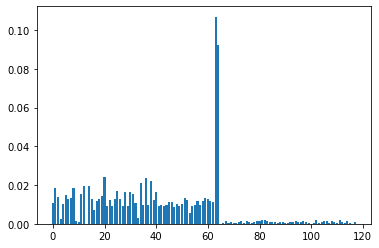

In [101]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()